In [3]:
from skimage import measure
import cv2
#import common
import numpy as np

#%matplotlib inline
import matplotlib.pyplot as plt
import pylab
import glob
from PIL import Image


In [ ]:
pip install opencv-python

## Construct array of images

In [4]:
tst1=plt.imread("straight_lines1.jpg")
tst2=plt.imread("straight_lines2.jpg")
tst3=plt.imread("test_.jpg")
tst4=plt.imread("test1.jpg")
tst5=plt.imread("test2.jpg")
tst6=plt.imread("test3.jpg")
tst7=plt.imread("test4.jpg")
tst8=plt.imread("test5.jpg")
tst9=plt.imread("test6.jpg")
test_images=[tst1,tst2,tst3,tst4,tst5,tst6,tst7,tst8,tst9]

## General functions

In [5]:
def show(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap = cmap_type)
    plt.title(title)

## HLS functions

In [39]:
'''define function to convert color spase from RGB to HSL
    Goal: adapt sunlight effect'''
def CVt2hls(img):
    hls = cv2.cvtColor(img,cv2.COLOR_RGB2HLS)
    h=hls[:,:,0]
    l=hls[:,:,1]
    s=hls[:,:,2]
    return h,l,s

'''define function to show different hsl channel for image 
    Goal: Figure out which channel is the best for edge detections'''
def tstHLS(test_images):
    row=0
    f,axes= plt.subplots(9,3, figsize=(20,20))
    f.subplots_adjust(hspace=0.5)
    for i in range(0,len(test_images)):
        img=test_images[i]
        h,l,s=CVt2hls(img)
        axes[row,0].imshow(h,cmap="gray")
        axes[row,0].set_title("H channel of test image "+str(i+1))
        axes[row,1].imshow(l,cmap="gray")
        axes[row,1].set_title("l channel of test image "+str(i+1))
        axes[row,2].imshow(s,cmap="gray")
        axes[row,2].set_title("s channel of test image "+str(i+1))
        row=row+1

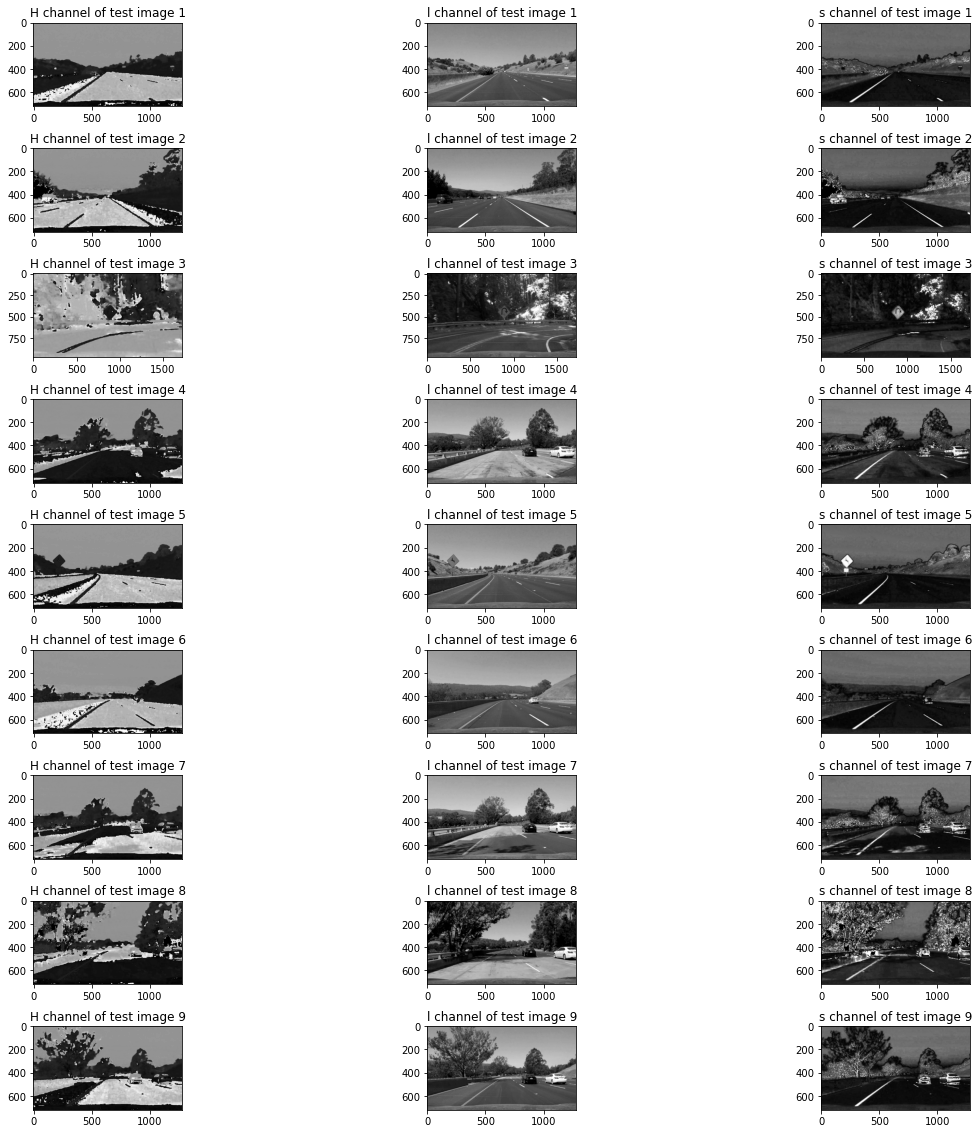

In [40]:
'''testing array of images'''
tstHLS(test_images)

In [7]:
'''S channel is the best for edge detection for every image in testing images'''

'S channel is the best for edge detection for every image in testing images'

## Prespective Transformation functions

In [8]:
'''function to get the matrix which will multiply to transform our images to bird eye view 
the goal of this step is getting rid of the lane curvature '''
def PerspectiveTransform(Src,Dst):
    M=cv2.getPerspectiveTransform(Src,Dst)
    Minv=cv2.getPerspectiveTransform(Dst,Src)
    return M,Minv
'''function to transform our images with multipling by the transformation matrix (M)  '''
'''INTER_LINEAR parameter refers to the method which resize the output by it with reect to the input image 
    this method depends on 2×2 neighboring pixels to get the weighted average for the interpolated pixel'''
def WarpImg (img,M):
    dsize=(img.shape[1],img.shape[0])
    return cv2.warpPerspective(img, M,(1280,720),cv2.INTER_LINEAR)


In [9]:
'''Now we need to determine the corners of the lane in input image and their coordinates in the output 
    GOAL is getting a bird eye view of lane and look like something like a rectangle'''

'''
src=np.float32([[300,700],[1075,700],[750,450],[620,450]])
dst=np.float32([[190,700],[1075,700],[1000,0],[200,0]])
-----------------------------------------------------------
src=np.float32([[200,700],[1200,700],[700,450],[595,450]])
dst=np.float32([[200,700],[1000,700],[700,450],[200,0]])'''

'''
by try and error we conclude somethings we should put them in consideration such the ratio of the offset 
for each point with respect to the size image'''
'''And by trying different values of offset we find that offset=200 is good'''    


offset=200
height, width= tst1.shape[0],tst1.shape[1]
src=np.float32([(595,450),(700,450),(1200,700),(200,700)])
dst=np.float32([(offset,0),(width-offset,0),(width-offset,height),(offset,height)])



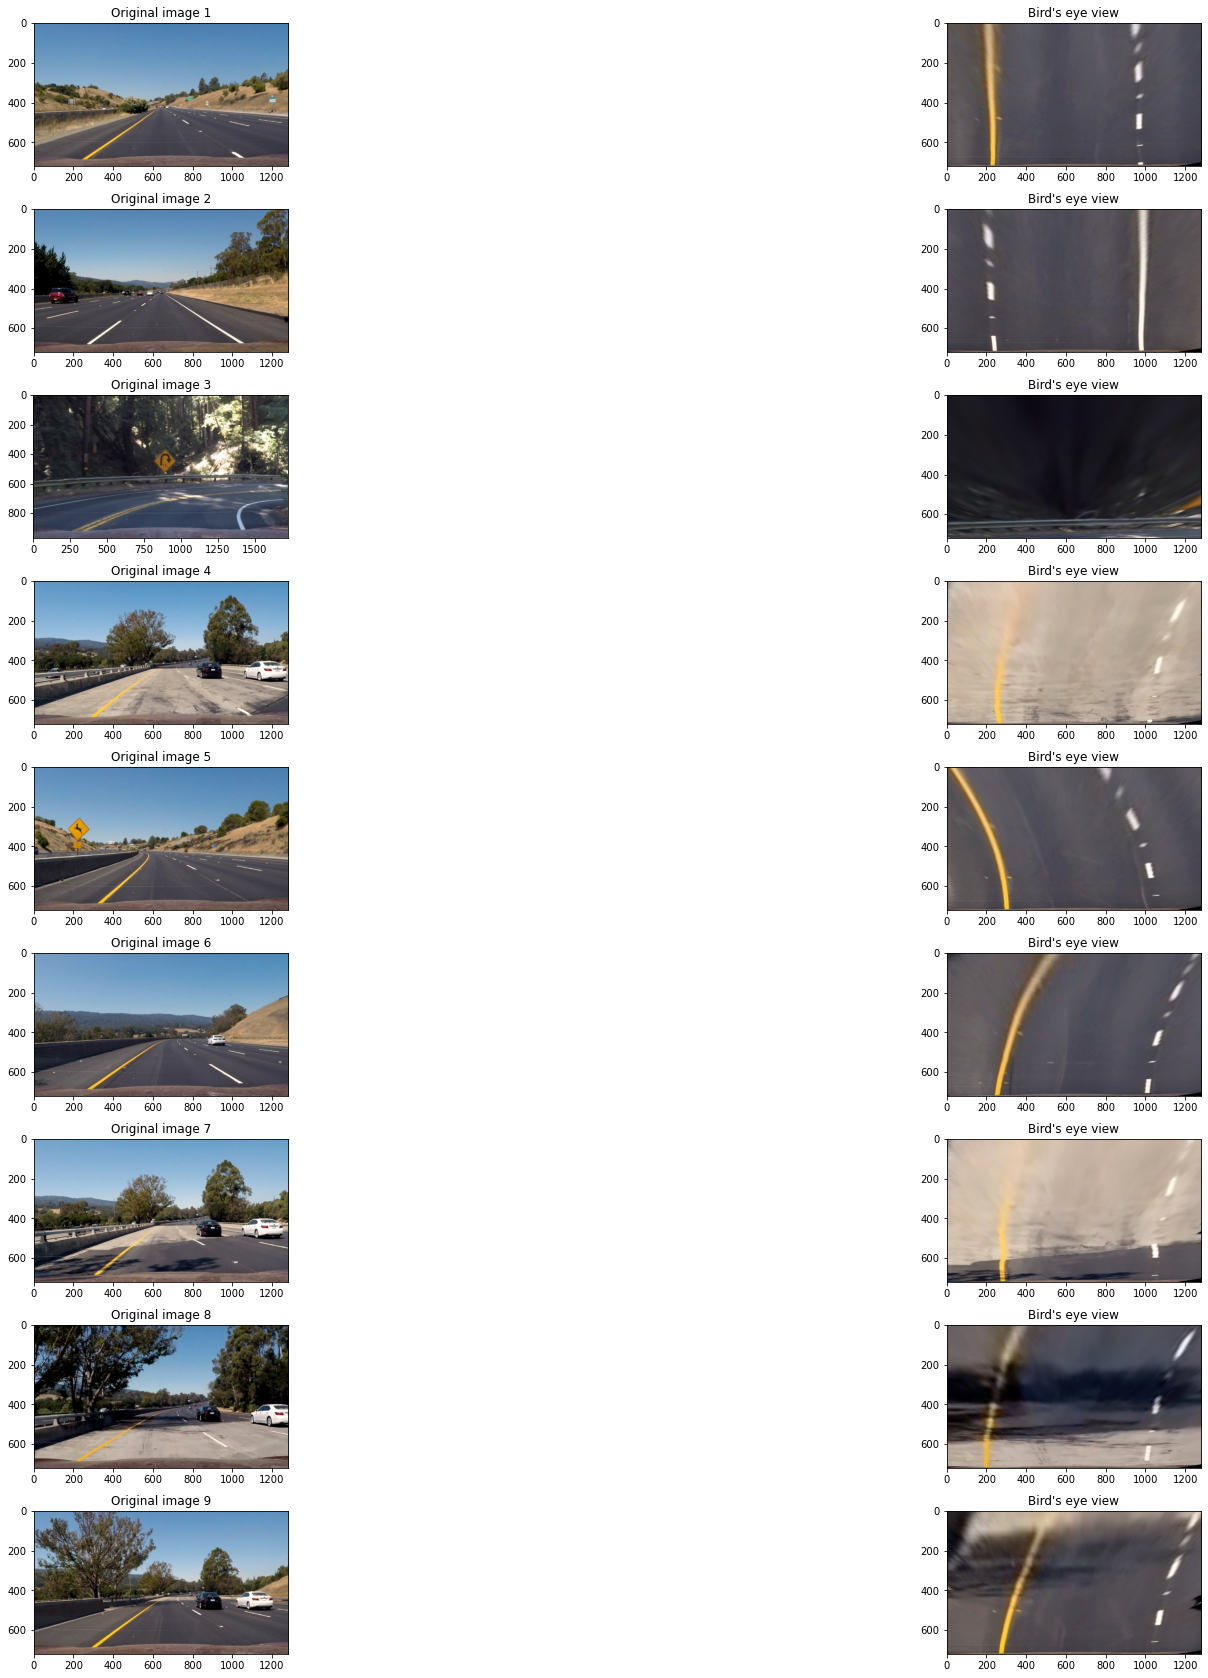

In [11]:
'''creating numpy array of output images and show them'''
Unwarped_images=[]
f,axes= plt.subplots(len(test_images),2, figsize=(30,30))
f.subplots_adjust(hspace=0.3)
row=0
for image in test_images :
    mat,inv=PerspectiveTransform(src,dst)
    unwarped_image= WarpImg(image,mat)
    Unwarped_images.append(unwarped_image)
    y=image.shape[0]
    x=image.shape[1]
    axes[row,0].imshow(image)
    axes[row,0].set_title('Original image '+str(row+1))
    axes[row,1].imshow(unwarped_image)
    axes[row,1].set_title("Bird's eye view")
    row+=1   